<a href="https://colab.research.google.com/github/shaqshree/INTELML/blob/main/user_reviews_nip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras 
import  numpy as np
import re 
import nltk


In [ ]:
training_data=pd.read_csv("train.csv")
testing_data=pd.read_csv("test.csv")


In [ ]:
training_data.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [ ]:
training_data.sample(10)

,id,keyword,location,text,target
3152,4526,emergency,Adelaide,Myanmar floods: Childfund https://t.co/pQHQ4Jn...,1
121,174,aftershock,Baker City Oregon,Aftershock: Protect Yourself and Profit in the...,0
4619,6567,injury,NaN,FollowNFLNews: Michael Floyd's hand injury sho...,0
6834,9788,trapped,å_å_Los Mina Cityã¢,Hollywood Movie About Trapped Miners Released ...,0
5135,7324,nuclear%20reactor,"Johannesburg, South Africa",@stunckle @Gordon_R74 @crazydoctorlady ...I'm ...,1
3275,4700,epicentre,"Charlotte, NC",Tomorrow kick off your weekend with drinks &am...,0
7498,10726,wreck,NaN,i still don't see the point of a frozen sequel...,0
6525,9333,survive,NaN,@adriennetomah how did people survive like that?!,0
5917,8448,screamed,Asgard,@GodOf_Mischief_ -of Loki's daggers she pulled...,1
632,912,bioterrorism,NaN,@APhiABeta1907 w/ugliness due 2 your 'ugly'@AM...,1


In [ ]:
training_data[training_data['target']==0].shape

(4342, 5)

In [ ]:
training_data[training_data['target']==1].shape

(3271, 5)

###test preprocessing


##converting to the lowerr case 

In [ ]:
training_data['new_text']=training_data['text'].apply(lambda x: x.lower())

In [ ]:
training_data.sample(5)

,id,keyword,location,text,target,new_text
6243,8916,snowstorm,This Is Paradise. Relax.,ÛÏ@LordBrathwaite: Everyone Here: Ahh I hate ...,1,ûï@lordbrathwaite: everyone here: ahh i hate ...
1600,2309,collapse,"Kolkata, India",Warne Ponting shocked by Australian collapse -...,0,warne ponting shocked by australian collapse -...
4274,6072,heat%20wave,"Oklahoma City, OK",Longest Streak of Triple-Digit Heat Since 2013...,1,longest streak of triple-digit heat since 2013...
4557,6478,injured,NaN,#golf McIlroy fuels PGA speculation after vide...,0,#golf mcilroy fuels pga speculation after vide...
1093,1579,bombed,"Dundas, Ontario",Jays rocking #MLB @JoeyBats19 just bombed one ...,0,jays rocking #mlb @joeybats19 just bombed one ...


###lemmatization

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [ ]:
lemm = WordNetLemmatizer()

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
training_data['new_text']=training_data['new_text'].apply(lambda x:lemm.lemmatize(x))

##remove stopwords

In [ ]:
from nltk.corpus import stopwords

In [ ]:
stop_words=stopwords.words("english")

In [ ]:
def remove_words(text):
  no_stop=[]
  for word in text.split(' '):
    if word in stop_words:
      pass
    else:
      no_stop.append(word)
    return ' '.join(no_stop)

In [ ]:
def remove_url_func(text):
   
  
    return re.sub(r'https?://\S+|www\.\S+', '', text)

In [ ]:
training_data['new_text']=training_data['new_text'].apply(remove_words)

Remove puctuation

In [ ]:
def remove_punctuation_func(text):
    '''
    Removes all punctuation from a string, if present
    
    Args:
        text (str): String to which the function is to be applied, string
    
    Returns:
        Clean string without punctuations
    '''
    return re.sub(r'[^a-zA-Z0-9]', ' ', text)

In [ ]:
training_data['new_text']=training_data['new_text'].apply(remove_punctuation_func)

##tokenization

In [ ]:
X=training_data['new_text']
Y=training_data['target']


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences



In [ ]:
X.shape

(7613,)

In [ ]:
tokenize =Tokenizer(num_words=5000,oov_token="<IDK>")
tokenize.fit_on_texts(X)

In [ ]:
seq= tokenize.texts_to_sequences(X)

In [ ]:
pad =pad_sequences(seq,padding='post',truncating='post',maxlen=50)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
len(pad),len(Y)

(7613, 7613)

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(pad,Y,test_size=0.2,train_size=0.8)

#Building a model RNN(Recurrent Neural Network)

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Embedding(5000,64))
model.add(keras.layers.Bidirectional(keras.layers.LSTM(64,return_sequences=True)))
model.add(keras.layers.Bidirectional(keras.layers.LSTM(64)))
model.add(keras.layers.Dense(128,activation="relu"))
model.add(keras.layers.Dense(1,activation="sigmoid"))



In [ ]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [ ]:
history=model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=5)

Epoch 1/5
191/191 [==============================] - 22s 40ms/step - loss: 0.6772 - accuracy: 0.5819 - val_loss: 0.6327 - val_accuracy: 0.6343
Epoch 2/5
191/191 [==============================] - 4s 20ms/step - loss: 0.5010 - accuracy: 0.7969 - val_loss: 0.6358 - val_accuracy: 0.6586
Epoch 3/5
191/191 [==============================] - 3s 16ms/step - loss: 0.3693 - accuracy: 0.8407 - val_loss: 0.6674 - val_accuracy: 0.6507
Epoch 4/5
191/191 [==============================] - 3s 17ms/step - loss: 0.3337 - accuracy: 0.8399 - val_loss: 0.6678 - val_accuracy: 0.6815
Epoch 5/5
191/191 [==============================] - 3s 18ms/step - loss: 0.3152 - accuracy: 0.8427 - val_loss: 0.7553 - val_accuracy: 0.6881


In [76]:
trained_epochs=history.epoch
data=pd.DataFrame(history.history)
import matplotlib.pyplot as plt

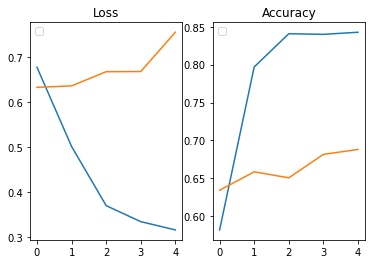

In [78]:
plt.subplot(1,2,1)
plt.plot(trained_epochs,data['loss'])
plt.plot(trained_epochs,data['val_loss'])
plt.title("Loss")
plt.legend()
plt.subplot(1,2,2)
plt.plot(trained_epochs,data['accuracy'])
plt.plot(trained_epochs,data['val_accuracy'])
plt.title("Accuracy")
plt.legend()
     